In [14]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow import keras as k
from keras.callbacks import EarlyStopping

In [ ]:
# Load the dataset
train_data = pd.read_csv("mnist_train.csv")
test_data = pd.read_csv("mnist_test.csv")

In [4]:
import matplotlib.pyplot as plt

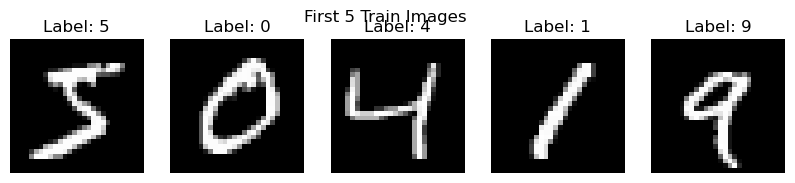

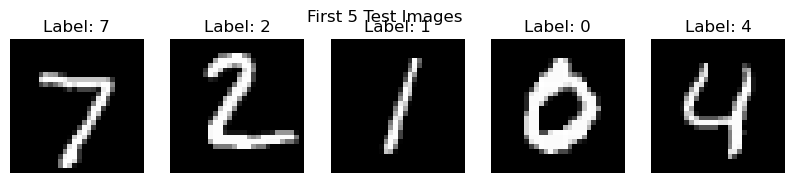

In [5]:
# Function to plot images
def plot_images(data, title, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(10, 2))
    for i in range(num_images):
        image = data.iloc[i, 1:].values.reshape(28, 28)  # Reshape to 28x28
        label = data.iloc[i, 0]  # First column is the label
        axes[i].imshow(image, cmap="gray")
        axes[i].set_title(f"Label: {label}")
        axes[i].axis("off")
    plt.suptitle(title)
    plt.show()

# Plot first 5 images from train and test data
plot_images(train_data, "First 5 Train Images")
plot_images(test_data, "First 5 Test Images")


In [9]:
# Extract labels and images
train_labels = train_data.iloc[:, 0].values  # First column is labels
test_labels = test_data.iloc[:, 0].values

train_images = train_data.iloc[:, 1:].values  # Remaining columns are pixels
test_images = test_data.iloc[:, 1:].values

# Reshape images into (num_samples, 28, 28, 1) format for CNN input
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

# Normalize pixel values (0-255) to range (0-1)
train_images, test_images = train_images / 255.0, test_images / 255.0

# Print shape to confirm
print("Train images shape:", train_images.shape)
print("Test images shape:", test_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (60000, 28, 28, 1)
Test images shape: (10000, 28, 28, 1)
Train labels shape: (60000,)
Test labels shape: (10000,)


In [10]:
# prompt: Now Create a simple ann for the above data with 4 hidden layers with rula as activation and 1 output layer with softmax as activation function

import numpy as np
from tensorflow import keras as k

# Assuming 'df' is your pandas DataFrame with 'col1' and 'col2'
# Convert the DataFrame to a NumPy array
X = train_images.reshape((60000, 28*28))
y = train_labels

# Define the ANN model
model = k.models.Sequential([
    k.layers.Dense(units=64, activation='relu', input_shape=(784,)),  # Input layer with 2 features (col1 and col2)
    k.layers.Dense(units=32, activation='relu'),  # Hidden layer 1
    k.layers.Dense(units=16, activation='relu'), # Hidden layer 2
    k.layers.Dense(units=8, activation='relu'), # Hidden layer 3
    k.layers.Dense(units=4, activation='relu'), # Hidden layer 4
    k.layers.Dense(units=10, activation='sigmoid')  # Output layer with sigmoid (for binary classification)
])


# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Prepare the data - Assuming binary classification, create labels (replace this with your actual labels)
labels = np.array([0, 1])

# Train the model
history = model.fit(X, y, epochs=10, validation_split=0.2)



c:\Users\lsrin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.5130 - loss: 1.4276 - val_accuracy: 0.9048 - val_loss: 0.5066
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9186 - loss: 0.4316 - val_accuracy: 0.9418 - val_loss: 0.2681
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9493 - loss: 0.2359 - val_accuracy: 0.9492 - val_loss: 0.2117
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9591 - loss: 0.1649 - val_accuracy: 0.9495 - val_loss: 0.1929
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9684 - loss: 0.1255 - val_accuracy: 0.9562 - val_loss: 0.1691
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9732 - loss: 0.0953 - val_accuracy: 0.9607 - val_loss: 0.1650
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9768 - loss: 0.0827 - val_accuracy: 0.9604 - val_loss: 0.1588
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9792 - loss: 0

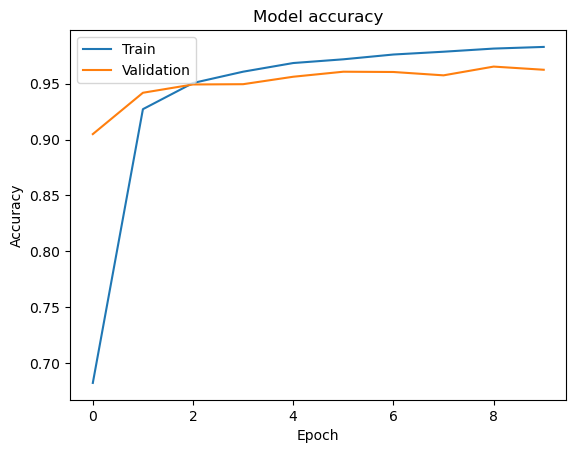

In [11]:
# Plot the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [12]:
MyModelCNN = k.models.Sequential([
    k.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    k.layers.MaxPooling2D((2, 2)),
    k.layers.Dropout(0.25), # Dropout layer after the first convolutional block
    k.layers.Conv2D(64, (3, 3), activation='relu'),
    k.layers.MaxPooling2D((2, 2)),
    k.layers.Dropout(0.25), # Dropout layer after the second convolutional block
    k.layers.Conv2D(64, (3, 3), activation='relu'),
    k.layers.Flatten(),
    k.layers.Dropout(0.5), # Dropout layer before the dense layer
    k.layers.Dense(64, activation='relu'),
    k.layers.Dense(10, activation='softmax')
])

c:\Users\lsrin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

MyModelCNN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
history = MyModelCNN.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels),
                      callbacks=[early_stopping])

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 27ms/step - accuracy: 0.8323 - loss: 0.5016 - val_accuracy: 0.9844 - val_loss: 0.0484
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9693 - loss: 0.0975 - val_accuracy: 0.9862 - val_loss: 0.0407
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9761 - loss: 0.0765 - val_accuracy: 0.9911 - val_loss: 0.0285
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - accuracy: 0.9806 - loss: 0.0627 - val_accuracy: 0.9907 - val_loss: 0.0304
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 24ms/step - accuracy: 0.9827 - loss: 0.0568 - val_accuracy: 0.9916 - val_loss: 0.0281
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 27ms/step - accuracy: 0.9840 - loss: 0.0507 - val_accuracy: 0.9916 - val_loss: 0.0301
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 31ms/step - accuracy: 0.9858 - loss: 0.0458 - val_accuracy: 0.9917 - val_loss: 0.0255
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9866 -

In [17]:
test_loss, test_acc = MyModelCNN.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9938 - loss: 0.0238
Test accuracy: 0.9944000244140625


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
[3.5548597e-10 9.3343539e-07 1.0563971e-06 1.8079902e-06 5.5759262e-08
 5.0221924e-09 4.5876351e-13 9.9998713e-01 4.8369515e-08 9.0060648e-06]


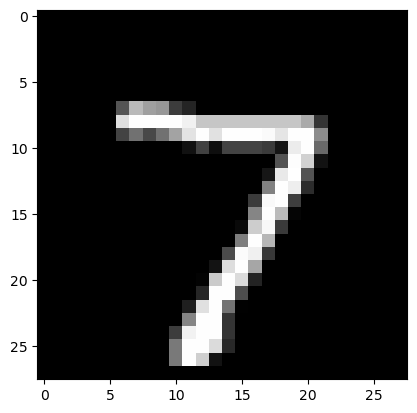

In [18]:
predictions = MyModelCNN.predict(test_images)
print(predictions[0])

img = test_images[0]
plt.imshow(img.reshape((28, 28)), cmap='gray')
plt.show()


(0.5, 1.0)

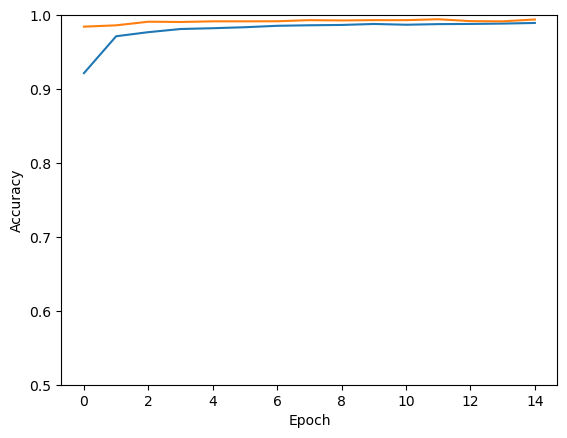

In [19]:
# Plot curve for accuracy and loss
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])

<function matplotlib.pyplot.ylim(*args, **kwargs) -> 'tuple[float, float]'>

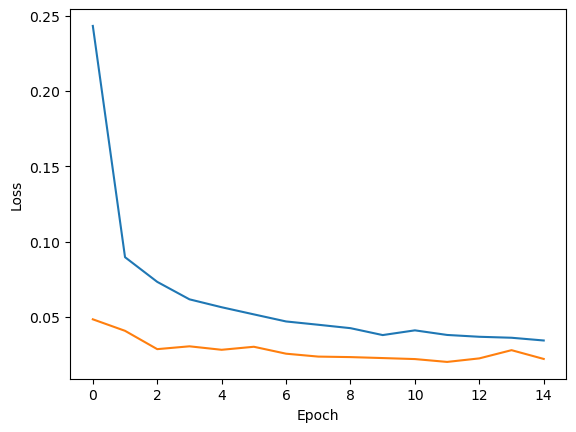

In [20]:
# Plot curve for loss and val_loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim